### Training And Testing Available Data


##### We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/carprices.csv')

In [4]:
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [5]:
df.sample(4)

,Mileage,Age(yrs),Sell Price($)
4,46000,4,31500
8,91000,8,12000
0,69000,6,18000
7,72000,6,19300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [7]:
import matplotlib.pyplot as plt

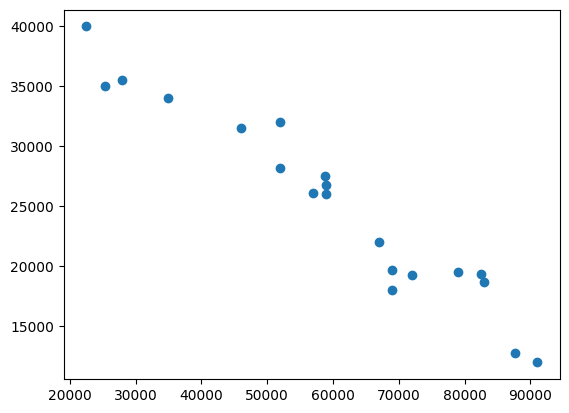

In [8]:
# Car Milage VS Sell Price
plt.scatter(df['Mileage'],df['Sell Price($)'])

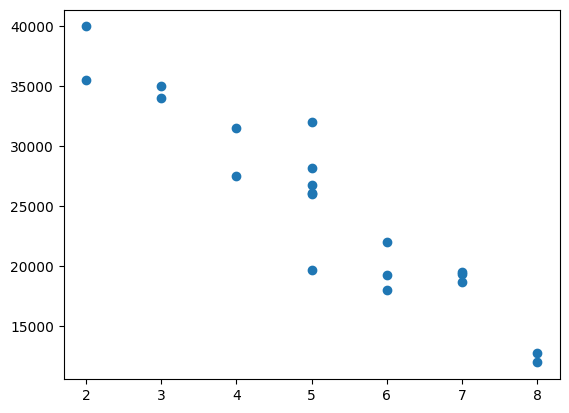

In [9]:
# Car Age Vs Sell Price ($)
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])


###### Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

Training: We will train our model on this dataset
Testing: We will use this subset to make actual predictions using trained model
The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [10]:
X = df[['Mileage','Age(yrs)']]

In [11]:
len(X)

20

In [12]:
y = y = df['Sell Price($)']

In [13]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [28]:
len(X_train)


14

In [29]:
len(X_test)


6

In [17]:
y_train


8     12000
4     31500
14    19400
5     26750
6     32000
18    12800
16    35500
19    28200
15    35000
3     40000
9     22000
7     19300
11    19500
2     26100
Name: Sell Price($), dtype: int64

In [18]:
y_test

17    19700
10    18700
12    26000
1     34000
0     18000
13    27500
Name: Sell Price($), dtype: int64

In [19]:
# Lets run linear regression model now
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [20]:
X_test

,Mileage,Age(yrs)
17,69000,5
10,83000,7
12,59000,5
1,35000,3
0,69000,6
13,58780,4


In [21]:
prediction = reg.predict(X_test)

In [22]:
y_test

17    19700
10    18700
12    26000
1     34000
0     18000
13    27500
Name: Sell Price($), dtype: int64

In [23]:
reg.score(X_test, y_test)

0.8546484224425355

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1742.897911787796
MSE: 4816668.652186899
RMSE: 2194.691015197105


Text(0, 0.5, 'Predicted Y')

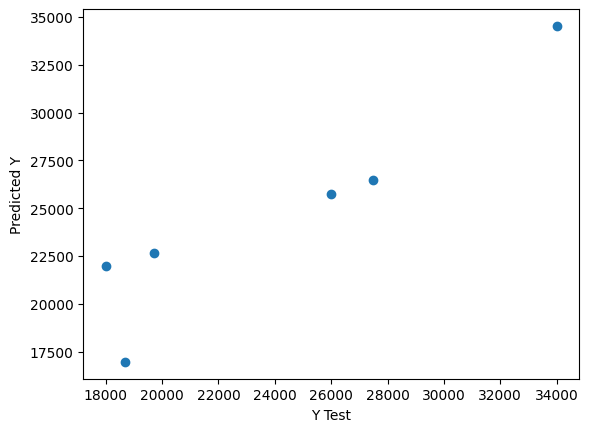

In [25]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')